In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('C:/Users/Lee Dong woo/Desktop/LGAimers/train.csv')
test = pd.read_csv('C:/Users/Lee Dong woo/Desktop/LGAimers/test.csv')
meta_x_features= pd.read_csv('C:/Users/Lee Dong woo/Desktop/LGAimers/meta/x_feature_info.csv')
meta_y_features= pd.read_csv('C:/Users/Lee Dong woo/Desktop/LGAimers/meta/y_feature_info.csv')

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
import random
import os
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    np.random.seed(seed)
seed_everything(42)
train_x = train.filter(regex='X') # Input : X Feature
train_y = train.filter(regex='Y') # Input : y Feature


Y_08

In [8]:
df8_pass=train_y[(train_y['Y_08']>=-29.2)&(train_y['Y_08']<=-24)]
df8_fail=train_y[(train_y['Y_08']<-29.2)|(train_y['Y_08']>-24)]



Pass, Fail 구분. 이후 X_feature 들에 대해서 boxplot 비교

In [11]:
df8_pass.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            39597, 39598, 39599, 39600, 39601, 39602, 39603, 39604, 39605,
            39606],
           dtype='int64', length=39588)

In [17]:
x08_train_pass = train_x.loc[df8_pass.index,:]
x08_train_fail = train_x.loc[df8_fail.index,:]
x08_train_pass

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,...,1,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,1,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,1,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,1,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,1,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,0.0,...,1,1,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812
39603,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,0.0,...,1,1,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413
39604,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,0.0,...,1,1,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699
39605,66.465,103.320,63.67,1,102.025,67.845,30.30,112.60,275.52,0.0,...,1,1,62222.33,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929


In [18]:
x08_train_fail

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
144,67.485,103.320,59.77,1,103.155,67.845,28.12,101.33,183.32,0.0,...,1,1,14721.03,127.074246,129.403637,138.681802,127.734366,133.427456,131.745579,129.317654
1091,72.583,103.320,74.87,1,101.854,72.943,28.51,103.97,134.89,0.0,...,1,1,14260.03,135.403355,127.894795,139.183420,133.935835,129.607990,128.273808,119.776333
1145,67.485,103.321,73.17,1,101.919,71.923,38.24,43.53,141.46,0.0,...,1,1,12402.63,130.678235,124.525860,142.549783,130.631086,124.253544,138.550160,121.441296
1248,67.485,103.320,74.97,1,101.900,73.963,31.69,123.18,205.12,0.0,...,1,1,17495.23,137.005261,132.316914,134.431055,137.648176,127.969158,134.421544,127.853367
14423,62.386,103.321,81.87,1,101.919,69.884,25.77,110.61,234.17,0.0,...,1,1,15404.63,128.003865,142.170666,141.549188,138.027205,137.085758,135.526577,134.366978
15051,63.406,103.321,65.17,1,102.027,68.864,27.34,113.90,251.53,0.0,...,1,1,14009.53,126.503522,134.130451,146.785387,129.849920,127.403995,136.484723,130.225193
15287,66.465,103.320,66.07,1,101.954,69.884,27.07,114.60,273.60,0.0,...,1,1,15658.43,125.745587,135.358456,142.937654,127.581740,128.934643,142.457150,129.221394
16522,66.465,103.320,66.27,1,102.004,70.904,28.49,246.57,278.36,0.0,...,1,1,19454.83,124.499646,126.916943,138.787561,120.867865,120.909229,131.511990,123.154911
17705,69.524,103.320,66.07,1,102.068,71.923,33.23,116.97,128.76,0.0,...,1,1,11039.83,123.447713,132.542576,126.984926,123.590231,126.878597,132.523060,122.955822
20785,65.445,103.320,62.57,1,102.019,66.825,29.74,99.21,276.75,0.0,...,1,1,17604.23,131.546864,127.481320,140.635065,124.544302,127.570286,134.873593,129.913105


In [19]:
x08_train_pass['X_60']='Pass'
x08_train_fail['X_60']='Fail'
x08_train_fail

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_60
144,67.485,103.320,59.77,1,103.155,67.845,28.12,101.33,183.32,0.0,...,1,14721.03,127.074246,129.403637,138.681802,127.734366,133.427456,131.745579,129.317654,Fail
1091,72.583,103.320,74.87,1,101.854,72.943,28.51,103.97,134.89,0.0,...,1,14260.03,135.403355,127.894795,139.183420,133.935835,129.607990,128.273808,119.776333,Fail
1145,67.485,103.321,73.17,1,101.919,71.923,38.24,43.53,141.46,0.0,...,1,12402.63,130.678235,124.525860,142.549783,130.631086,124.253544,138.550160,121.441296,Fail
1248,67.485,103.320,74.97,1,101.900,73.963,31.69,123.18,205.12,0.0,...,1,17495.23,137.005261,132.316914,134.431055,137.648176,127.969158,134.421544,127.853367,Fail
14423,62.386,103.321,81.87,1,101.919,69.884,25.77,110.61,234.17,0.0,...,1,15404.63,128.003865,142.170666,141.549188,138.027205,137.085758,135.526577,134.366978,Fail
15051,63.406,103.321,65.17,1,102.027,68.864,27.34,113.90,251.53,0.0,...,1,14009.53,126.503522,134.130451,146.785387,129.849920,127.403995,136.484723,130.225193,Fail
15287,66.465,103.320,66.07,1,101.954,69.884,27.07,114.60,273.60,0.0,...,1,15658.43,125.745587,135.358456,142.937654,127.581740,128.934643,142.457150,129.221394,Fail
16522,66.465,103.320,66.27,1,102.004,70.904,28.49,246.57,278.36,0.0,...,1,19454.83,124.499646,126.916943,138.787561,120.867865,120.909229,131.511990,123.154911,Fail
17705,69.524,103.320,66.07,1,102.068,71.923,33.23,116.97,128.76,0.0,...,1,11039.83,123.447713,132.542576,126.984926,123.590231,126.878597,132.523060,122.955822,Fail
20785,65.445,103.320,62.57,1,102.019,66.825,29.74,99.21,276.75,0.0,...,1,17604.23,131.546864,127.481320,140.635065,124.544302,127.570286,134.873593,129.913105,Fail


In [22]:
x08_train = pd.concat([x08_train_pass,x08_train_fail],ignore_index=True)
x08_train

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_60
0,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,...,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256,Pass
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308,Pass
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232,Pass
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225,Pass
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,65.445,103.320,66.37,1,102.032,70.904,29.01,363.18,271.27,0.0,...,1,26999.23,131.005353,124.942623,134.739191,132.457708,128.200481,133.932126,133.834156,Fail
39603,65.445,103.321,63.47,1,101.908,66.825,27.43,178.40,259.59,0.0,...,1,14733.83,136.401280,138.517666,144.216653,134.230711,129.154659,142.117344,131.795719,Fail
39604,67.485,103.320,65.17,1,102.010,68.864,28.54,1379.32,37.58,0.0,...,1,12797.13,131.929204,133.472256,140.121263,127.391127,130.254474,144.952481,122.756191,Fail
39605,66.465,103.320,64.57,1,102.011,68.864,29.70,62.90,295.74,0.0,...,1,13655.23,133.148167,128.490559,142.391069,121.676527,127.035877,142.989354,134.360516,Fail


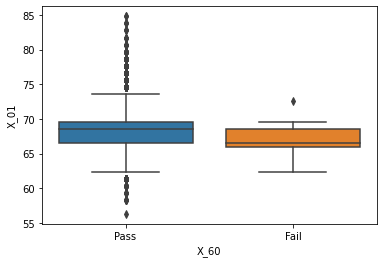

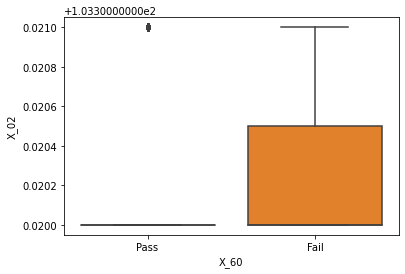

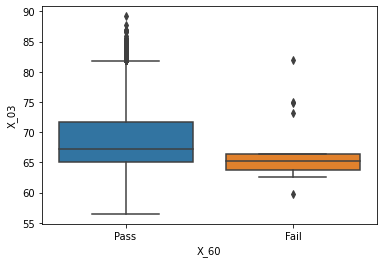

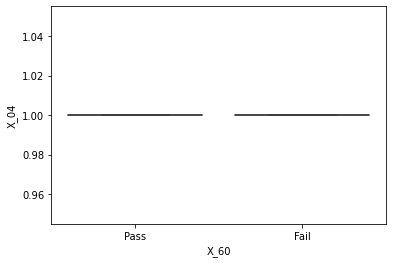

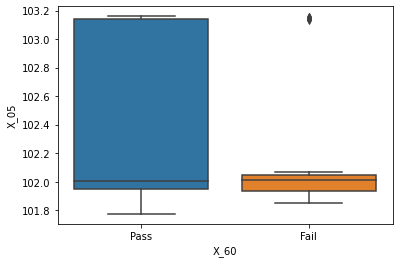

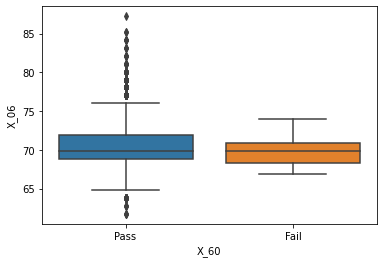

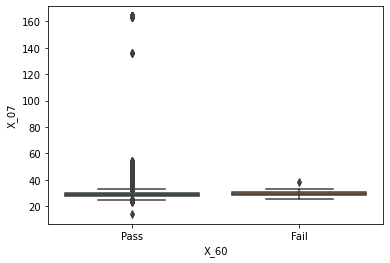

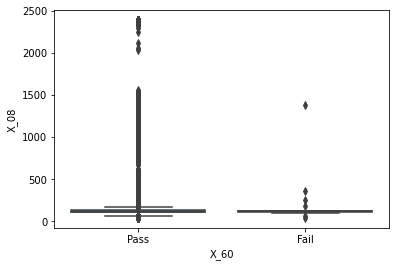

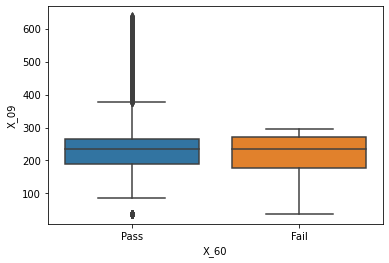

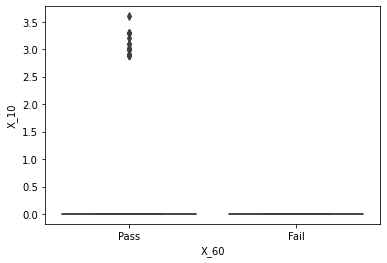

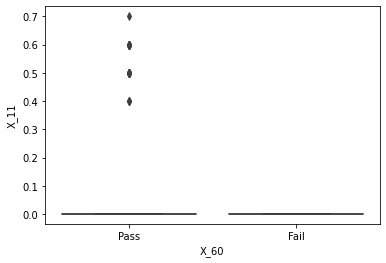

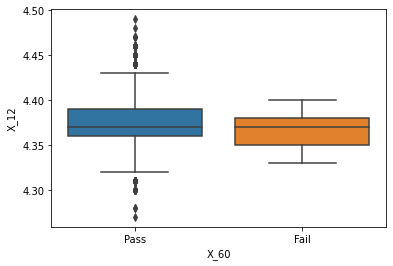

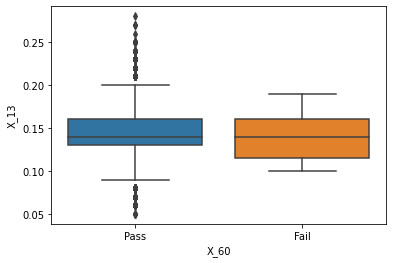

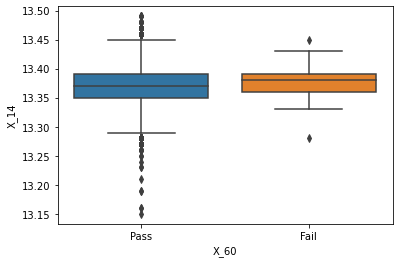

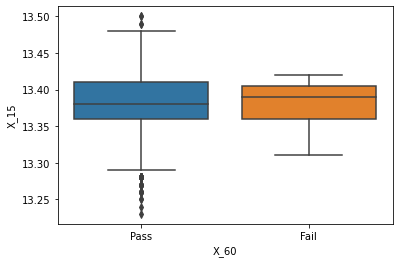

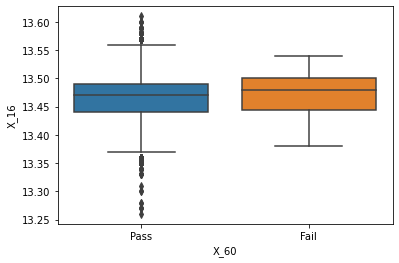

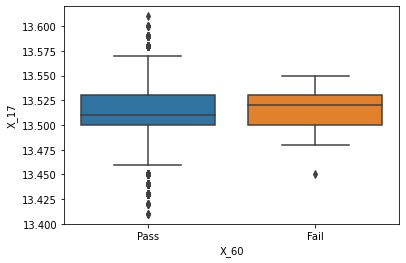

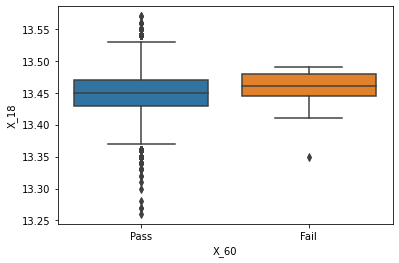

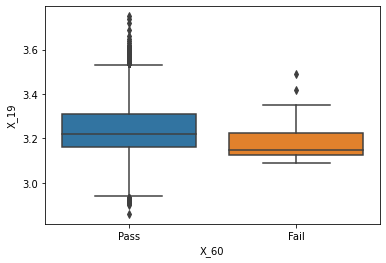

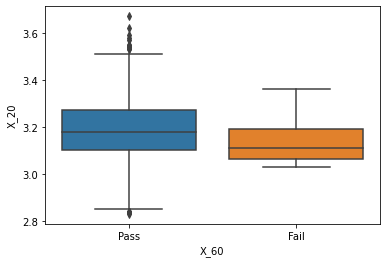

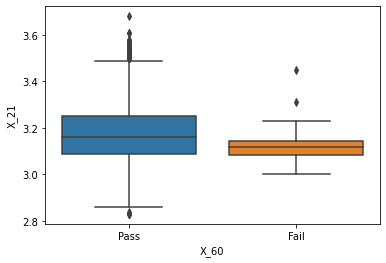

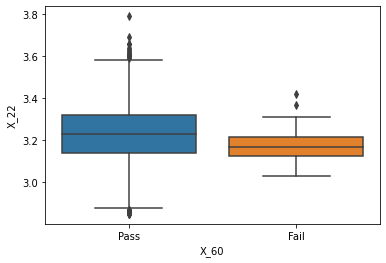

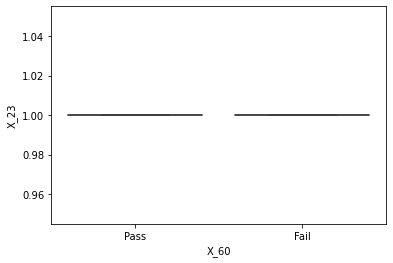

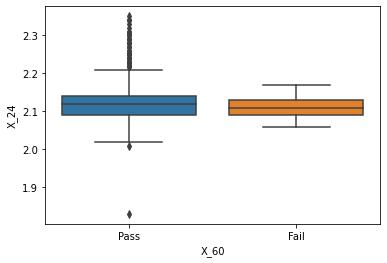

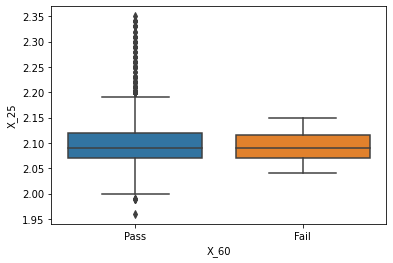

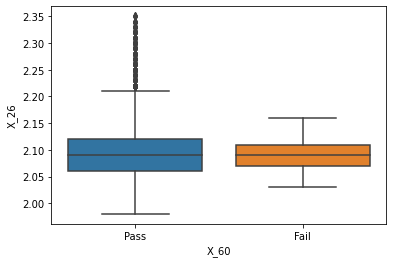

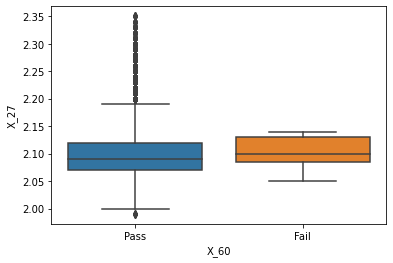

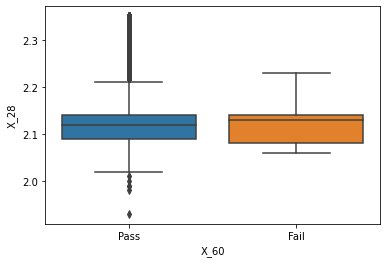

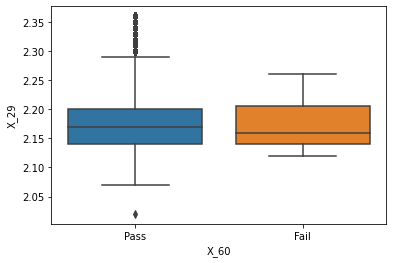

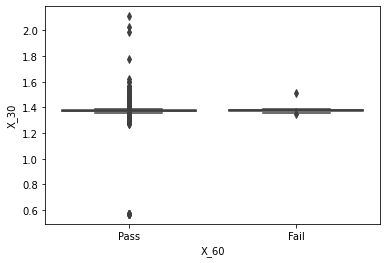

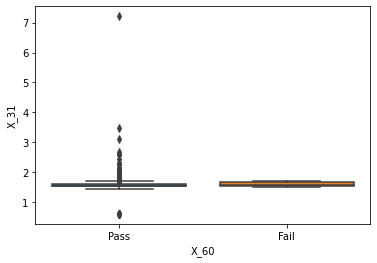

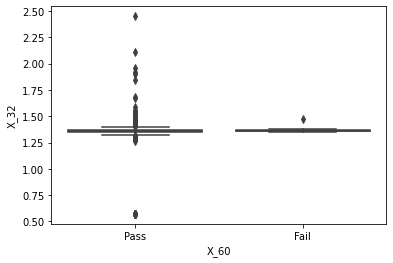

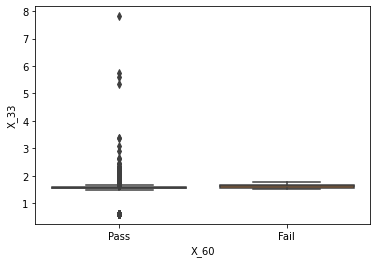

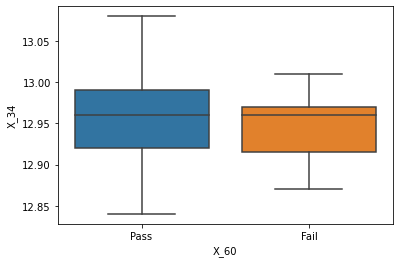

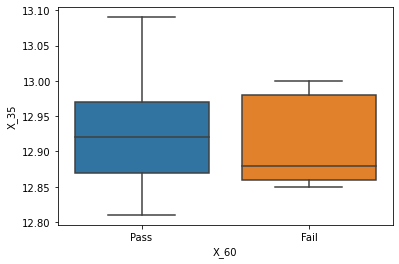

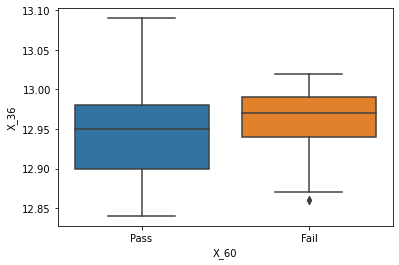

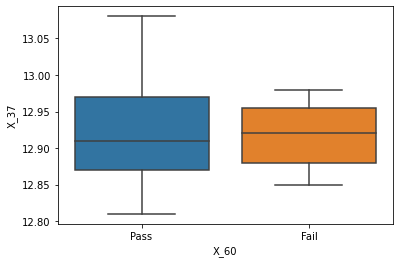

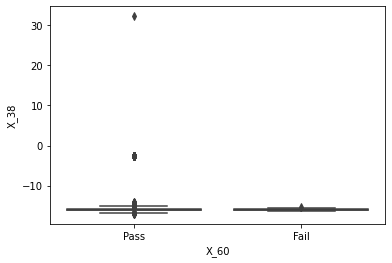

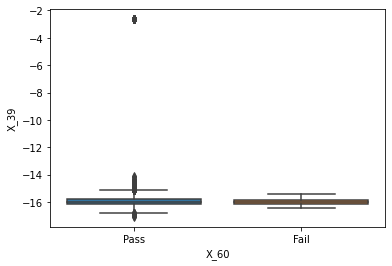

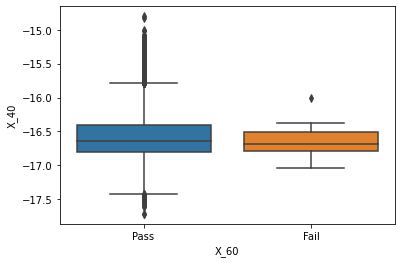

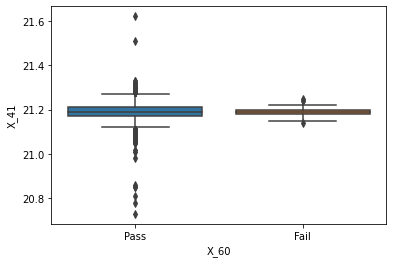

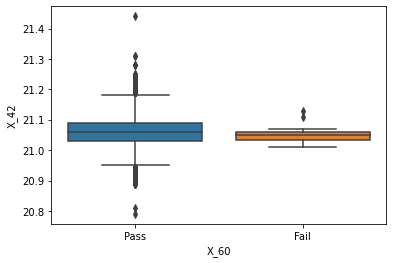

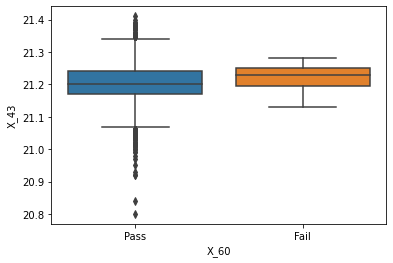

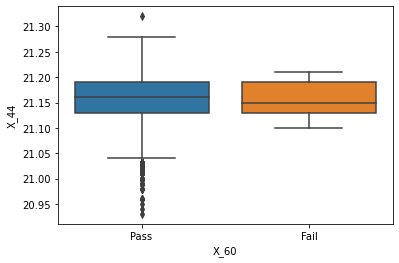

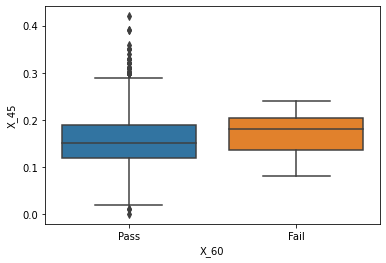

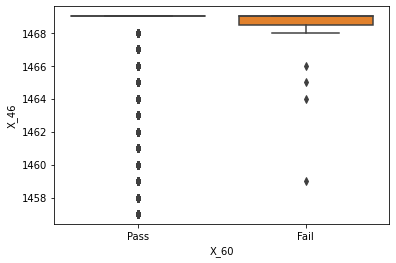

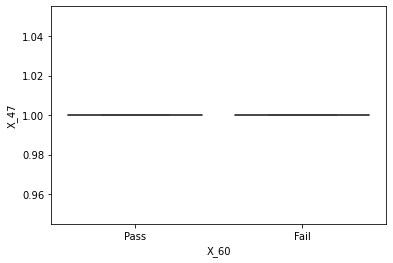

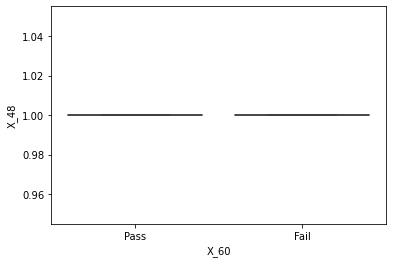

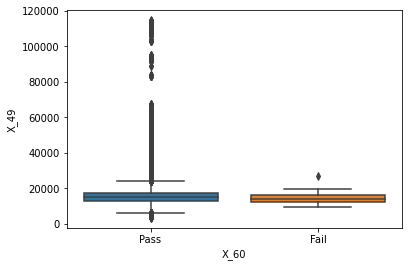

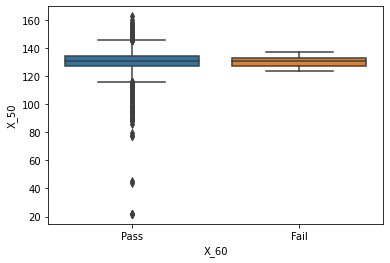

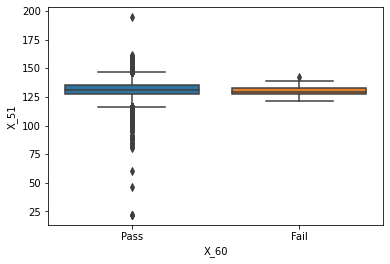

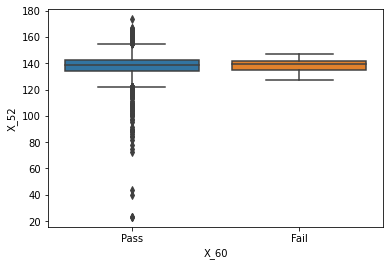

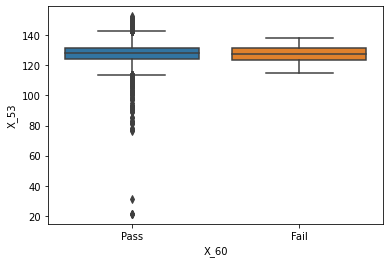

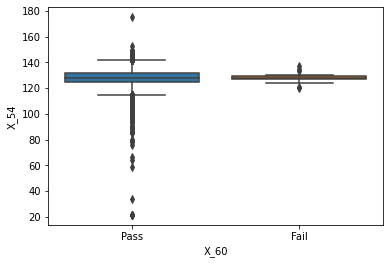

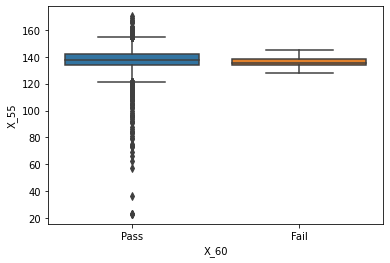

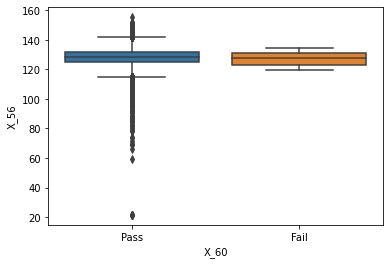

In [23]:
import seaborn as sns
for i in range(1,57):
    if i<10:
        sns.boxplot(x='X_60',y='X_{}'.format('0'+str(i)),data=x08_train)
        plt.show()
    else:
        sns.boxplot(x='X_60',y='X_{}'.format(i),data=x08_train)
        plt.show()

In [30]:
print(x08_train[x08_train['X_60']=='Pass']['X_02'].value_counts())
print(x08_train[x08_train['X_60']=='Fail']['X_02'].value_counts())


103.320    33006
103.321     6582
Name: X_02, dtype: int64
103.320    14
103.321     5
Name: X_02, dtype: int64


In [31]:
x08_train['X_02'].value_counts()

103.320    33020
103.321     6587
Name: X_02, dtype: int64

In [27]:
x08_train['X_01'].value_counts()

68.504    6547
66.465    6324
69.524    5799
67.485    5585
71.563    2886
70.544    2886
65.445    2773
64.425    2300
72.583    1243
73.603    1143
63.406     765
74.623     592
62.386     211
75.642     191
76.662     140
61.366      86
77.682      48
78.702      30
79.721      17
60.347      12
58.307       6
80.741       5
59.327       5
81.761       4
82.780       3
83.800       3
84.820       2
56.268       1
Name: X_01, dtype: int64

In [28]:
x08_train

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_60
0,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,...,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256,Pass
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308,Pass
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232,Pass
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225,Pass
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,65.445,103.320,66.37,1,102.032,70.904,29.01,363.18,271.27,0.0,...,1,26999.23,131.005353,124.942623,134.739191,132.457708,128.200481,133.932126,133.834156,Fail
39603,65.445,103.321,63.47,1,101.908,66.825,27.43,178.40,259.59,0.0,...,1,14733.83,136.401280,138.517666,144.216653,134.230711,129.154659,142.117344,131.795719,Fail
39604,67.485,103.320,65.17,1,102.010,68.864,28.54,1379.32,37.58,0.0,...,1,12797.13,131.929204,133.472256,140.121263,127.391127,130.254474,144.952481,122.756191,Fail
39605,66.465,103.320,64.57,1,102.011,68.864,29.70,62.90,295.74,0.0,...,1,13655.23,133.148167,128.490559,142.391069,121.676527,127.035877,142.989354,134.360516,Fail


Y_09


In [ ]:
df9_pass=train_y[(train_y['Y_09']>=-29.2)&(train_y['Y_09']<=-24)]
df9_fail=train_y[(train_y['Y_09']<-29.2)|(train_y['Y_09']>-24)]



Y_10

In [2]:
df10_pass=train_y[(train_y['Y_10']>=-30.6)&(train_y['Y_10']<=-20)]
df10_fail=train_y[(train_y['Y_10']<-30.6)|(train_y['Y_10']>-20)]



Y_11

In [3]:
df11_pass=train_y[(train_y['Y_11']>=19.6)&(train_y['Y_11']<=26.6)]
df11_fail=train_y[(train_y['Y_11']<19.6)|(train_y['Y_11']>26.6)]



Y_12


In [5]:
df12_pass=train_y[(train_y['Y_12']>=-29.2)&(train_y['Y_12']<=-24)]
df12_fail=train_y[(train_y['Y_12']<-29.2)|(train_y['Y_12']>-24)]



Y_13

In [6]:
df13_pass=train_y[(train_y['Y_13']>=-29.2)&(train_y['Y_13']<=-24)]
df13_fail=train_y[(train_y['Y_13']<-29.2)|(train_y['Y_13']>-24)]



Y_14

In [ ]:
df14_pass=train_y[(train_y['Y_14']>=-29.2)&(train_y['Y_14']<=-24)]
df14_fail=train_y[(train_y['Y_14']<-29.2)|(train_y['Y_14']>-24)]


